In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,20)

(0, 15)

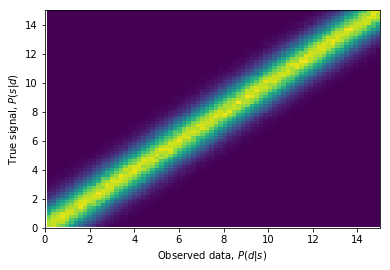

In [7]:
backgrnd = stats.norm.rvs(loc=0, scale=1, size=1000000)
x = np.linspace(-20,20,100)
signal = stats.uniform.rvs(loc=0, scale=15, size=1000000)
new_data = backgrnd + signal

data_edge = np.linspace(0,20,100)
signal_edge = np.linspace(0,20,100)

## Did some research about histogram2d, this will help me plot the data
psd, x, y = np.histogram2d(new_data,signal, bins=[data_edge,signal_edge], density=True)
centered_data = (data_edge[:-1] + data_edge[1:]) / 2
signal_center = (signal_edge[:-1] + signal_edge[1:]) / 2
plt.pcolormesh(centered_data, signal_center, psd.transpose())
plt.ylabel('True signal, $P(s|d)$')
plt.xlabel('Observed data, $P(d|s)$')
plt.xlim([0,15])
plt.ylim([0,15])

In [8]:
new_table = pd.DataFrame(columns = ['Signal', 'Background', 'Data'])
new_table['Data'] = new_data
new_table['Signal'] = signal
new_table['Background'] = backgrnd

Text(0.5,1,'True Signal at a value of 15 of Observed Signal Spread')

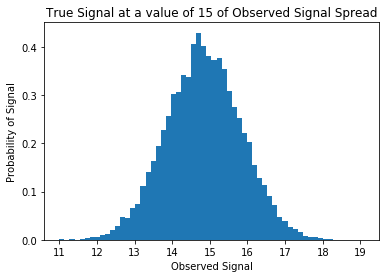

In [9]:
sig_12 = new_table.query(f'11.7 < Signal < 12.3')
plt.hist(sig_12['Data'], bins =60, density = True)
plt.xlabel('Observed Signal')
plt.ylabel('Probability of Signal')
plt.title('True Signal at a value of 15 of Observed Signal Spread')

Text(0.5,1,'Observed Signal at a value of 15 of possibility of true signal spread')

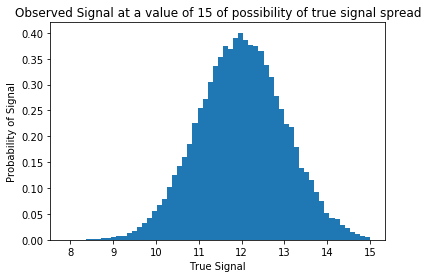

In [14]:
obs_sig_12 = new_table.query(f'11.7 < Data < 12.3')
plt.hist(obs_sig_12['Signal'], bins =60, density = True)
plt.xlabel('True Signal')
plt.ylabel('Probability of Signal')
plt.title('Observed Signal at a value of 15 of possibility of true signal spread')


(0, 23)

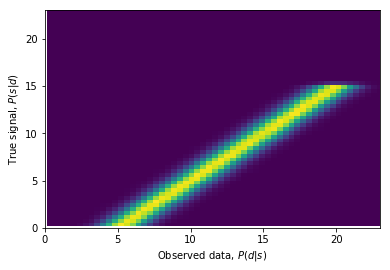

In [18]:
backgrnd = stats.norm.rvs(loc=5, scale=1, size=1000000)
x = np.linspace(-20,20,100)
signal = stats.uniform.rvs(loc=0, scale=15, size=1000000)
new_data = backgrnd + signal

data_edge = np.linspace(0,40,100)
signal_edge = np.linspace(0,40,100)

## Did some research about histogram2d, this will help me plot the data
psd, x, y = np.histogram2d(new_data,signal, bins=[data_edge,signal_edge], density=True)
centered_data = (data_edge[:-1] + data_edge[1:]) / 2
signal_center = (signal_edge[:-1] + signal_edge[1:]) / 2
plt.pcolormesh(centered_data, signal_center, psd.transpose())
plt.ylabel('True signal, $P(s|d)$')
plt.xlabel('Observed data, $P(d|s)$')
plt.xlim([0,23])
plt.ylim([0,23])

In [19]:
new_table = pd.DataFrame(columns = ['Signal', 'Background', 'Data'])
new_table['Data'] = new_data
new_table['Signal'] = signal
new_table['Background'] = backgrnd

Text(0.5,1,'True Signal at a value of 15 of Observed Signal Spread')

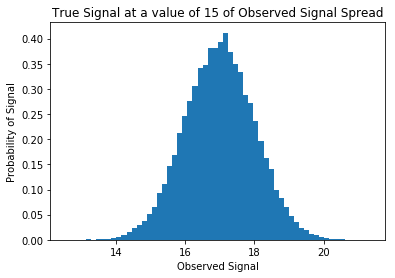

In [20]:
sig_12 = new_table.query(f'11.7 < Signal < 12.3')
plt.hist(sig_12['Data'], bins =60, density = True)
plt.xlabel('Observed Signal')
plt.ylabel('Probability of Signal')
plt.title('True Signal at a value of 15 of Observed Signal Spread')

Text(0.5,1,'Observed Signal at a value of 15 of possibility of true signal spread')

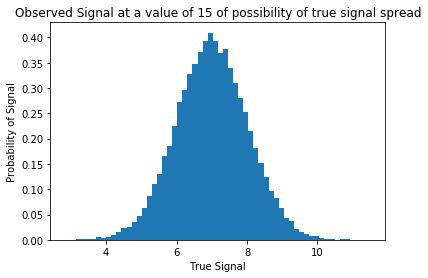

In [21]:
obs_sig_12 = new_table.query(f'11.7 < Data < 12.3')
plt.hist(obs_sig_12['Signal'], bins =60, density = True)
plt.xlabel('True Signal')
plt.ylabel('Probability of Signal')
plt.title('Observed Signal at a value of 15 of possibility of true signal spread')

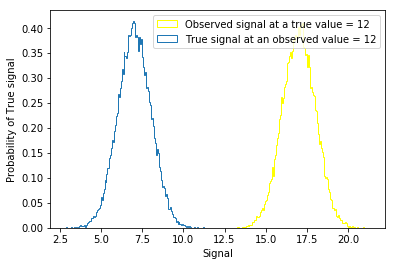

In [23]:
plt.hist(sig_12['Data'], bins =150, density = True, histtype='step', color='yellow', label="Observed signal at a true value = 12")
plt.hist(obs_sig_12['Signal'], bins =150, density = True, histtype='step', label="True signal at an observed value = 12")
plt.xlabel('Signal')
plt.ylabel('Probability of True signal')
plt.legend()